parameter w :
 [[3.94188011]
 [8.73592461]]


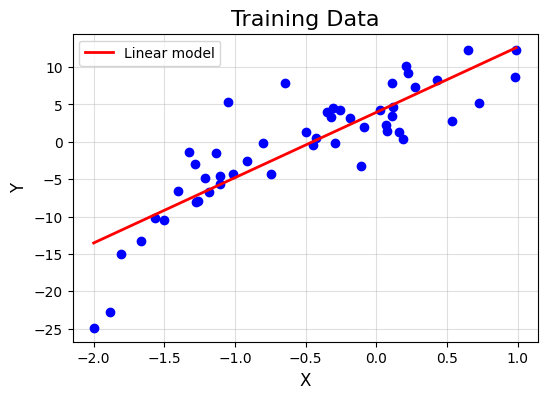

In [ ]:

import pandas as pd

x = pd.read_csv('/content/drive/MyDrive/data0405.csv', usecols=['x']).values
y = pd.read_csv('/content/drive/MyDrive/data0405.csv', usecols=['y']).values
plt.figure(figsize = (6, 4))
plt.plot(x, y, 'bo')
plt.title('Training Data', fontsize = 16)
plt.xlabel('X', fontsize = 12)
plt.ylabel('Y', fontsize = 12)
plt.grid(alpha = 0.4)

A = np.hstack([x**0, x])
A = np.asmatrix(A)
#print('A :\n', A)

w = (A.T*A).I*A.T*y
print('parameter w :\n', w)

# 선형모델 plotting (최소제곱법)
xp = np.arange(-2, 1, 0.01).reshape(-1, 1)
yp = w[0,0] + w[1,0]*xp
#print(yp)
plt.plot(xp, yp, 'r', linewidth = 2, label = "Linear model")
plt.legend()
plt.grid(alpha = 0.4)
plt.show()


parameter w :
 [[3.94188011]
 [8.73592461]]


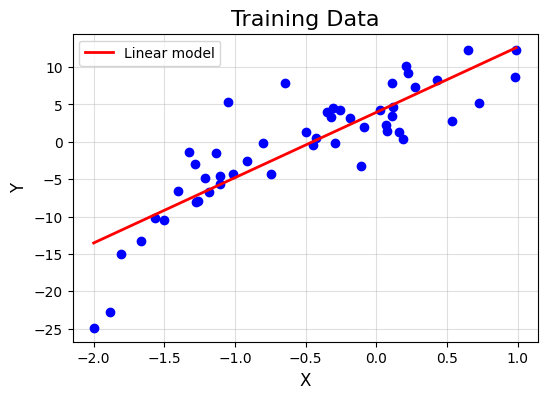

parameter w :
 [[ 5.03906362]
 [ 5.27924916]
 [-3.31676315]]
parameter w :
 [[  2.70561069]
 [  8.7466361 ]
 [ 24.11081469]
 [ -7.17740071]
 [-70.59489961]
 [-20.12073822]
 [ 59.53548381]
 [ 36.49128236]
 [ -8.88620274]
 [-11.06845324]
 [ -2.15841396]]


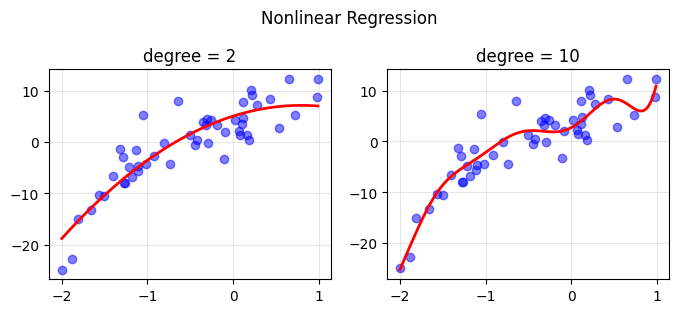

In [16]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# CSV 파일에서 x, y 데이터 읽기
x = pd.read_csv('/content/drive/MyDrive/data0405.csv', usecols=['x']).values
y = pd.read_csv('/content/drive/MyDrive/data0405.csv', usecols=['y']).values

# 학습 데이터 시각화
plt.figure(figsize = (6, 4))
plt.plot(x, y, 'bo')  # 파란색 점으로 데이터 표시
plt.title('Training Data', fontsize = 16)
plt.xlabel('X', fontsize = 12)
plt.ylabel('Y', fontsize = 12)
plt.grid(alpha = 0.4)

# 선형 모델을 위한 A 행렬 구성: [1, x] 형태
A = np.hstack([x**0, x])  # x^0 = 1 (절편), x
A = np.asmatrix(A)

# 최소제곱법 공식: w = (A^T A)^(-1) A^T y
w = (A.T*A).I*A.T*y
print('parameter w :\n', w)

# 선형 모델을 위한 예측값 계산
xp = np.arange(-2, 1, 0.01).reshape(-1, 1)  # 예측 범위 설정
yp = w[0,0] + w[1,0]*xp  # 예측값 계산

# 예측 선 그리기
plt.plot(xp, yp, 'r', linewidth = 2, label = "Linear model")
plt.legend()
plt.grid(alpha = 0.4)
plt.show()

# 다항 회귀: 2차, 10차
d = [2, 10]
RSS = []  # 잔차 제곱합 저장용 리스트

# 서브플롯 그리기
plt.figure(figsize = (8, 6))
plt.suptitle('Nonlinear Regression', fontsize = 12)

for k in range(2):
    # 다항 기저 함수 생성 (예측용 xp 기반)
    polybasis = np.hstack([xp**i for i in range(d[k]+1)])
    polybasis = np.asmatrix(polybasis)

    # 학습용 A 행렬 구성 (입력 데이터 x 기반)
    A = np.hstack([x**i for i in range(d[k]+1)])
    A = np.asmatrix(A)

    # 최소제곱법으로 가중치 계산
    w = (A.T*A).I*A.T*y
    print('parameter w :\n', w)

    # 예측값 계산
    yp = polybasis*w

    # 잔차 제곱합 계산
    RSS.append(np.linalg.norm(y - A*w, 2)**2)

    # 예측 결과 시각화
    plt.subplot(2, 2, k+1)
    plt.plot(x, y, 'bo', alpha = 0.5)
    plt.plot(xp, yp, 'r', linewidth = 2)
    plt.title('degree = {}'.format(d[k]))
    plt.grid(alpha=0.3)

plt.show()


[2.23603262] [0.06825886]


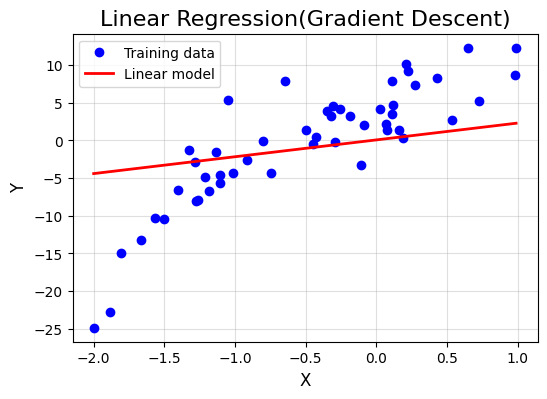

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

x = pd.read_csv('/content/drive/MyDrive/data0405.csv', usecols=['x']).values
y = pd.read_csv('/content/drive/MyDrive/data0405.csv', usecols=['y']).values

# m = y.shape[0]
# np.hstack([np.ones([m,1]), x])
A = np.hstack([x**0, x])  # data x의 앞에 1을 horizontal 방향으로 추가
A = np.asmatrix(A)
# print('A :\n', A)

w1 = 0       # 기울기
w0 = 0       # 절편

lrate = 0.001  # 학습률(Learning rate) --> α
epochs = 500  # 반복 횟수

n = float(len(x)) # 입력 데이터의 개수

# 경사 하강법
for i in range(epochs):
    y_pred = w1*x + w0  		          	# 선형 회귀 예측값
    dw1 = (1/n) * sum(x * (y_pred-y)) 	# 넘파이 배열간의 산술 계산은 요소별로 적용
    dw0 = (1/n) * sum(y_pred-y)  	      # sum()은 모든 요소들의 합을 계산하는 내장 함수
    w1 = w1 - lrate * dw1           		# 기울기 update
    w0 = w0 - lrate * dw0  		          # 절편 update
print (w1, w0)

# 학습 데이터 그래프
plt.figure(figsize = (6, 4))
plt.title('Linear Regression(Gradient Descent)', fontsize = 16)
plt.xlabel('X', fontsize = 12)
plt.ylabel('Y', fontsize = 12)
plt.plot(x, y, 'bo', label = "Training data")

xp = np.arange(-2, 1, 0.01).reshape(-1, 1)
y_pred = w1*xp + w0  # 예측값을 만든다.
#print(y_pred)
plt.plot(xp, y_pred, 'r', linewidth = 2, label = "Linear model")
plt.legend()
plt.grid(alpha = 0.4)
plt.show()

[2.23603262] [0.06825886]


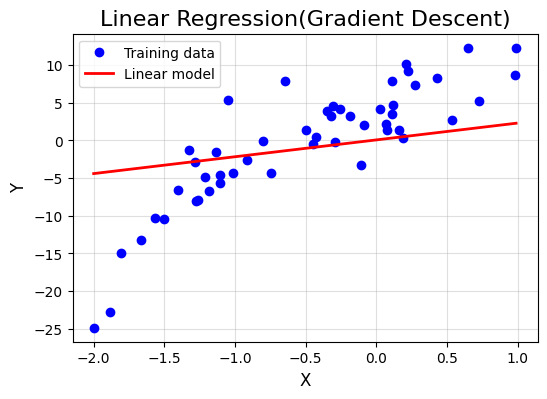

parameter w :
 [[ 5.03906362]
 [ 5.27924916]
 [-3.31676315]]
parameter w :
 [[ 3.63261904]
 [ 5.43470387]
 [ 1.83955091]
 [ 0.76437773]
 [-1.20609535]]


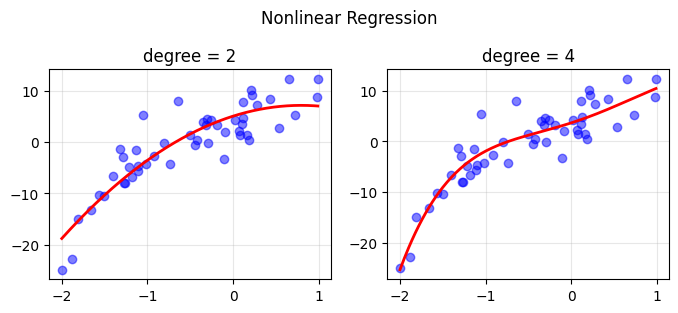

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# CSV 파일에서 x, y 데이터 읽기
x = pd.read_csv('/content/drive/MyDrive/data0405.csv', usecols=['x']).values
y = pd.read_csv('/content/drive/MyDrive/data0405.csv', usecols=['y']).values

# A 행렬 (사용하지는 않지만 참고용)
A = np.hstack([x**0, x])
A = np.asmatrix(A)

# 가중치 초기값 설정
w1 = 0  # 기울기 (slope)
w0 = 0  # 절편 (bias)

# 학습률과 반복 횟수
lrate = 0.001
epochs = 500

n = float(len(x))  # 데이터 개수

# 경사하강법을 통한 선형 회귀 학습
for i in range(epochs):
    y_pred = w1*x + w0  # 예측값 계산
    dw1 = (1/n) * sum(x * (y_pred - y))  # w1에 대한 gradient
    dw0 = (1/n) * sum(y_pred - y)        # w0에 대한 gradient
    w1 = w1 - lrate * dw1                # w1 업데이트
    w0 = w0 - lrate * dw0                # w0 업데이트

print(w1, w0)  # 학습된 파라미터 출력

# 시각화
plt.figure(figsize = (6, 4))
plt.title('Linear Regression(Gradient Descent)', fontsize = 16)
plt.xlabel('X', fontsize = 12)
plt.ylabel('Y', fontsize = 12)
plt.plot(x, y, 'bo', label = "Training data")

# 예측 선 그리기
xp = np.arange(-2, 1, 0.01).reshape(-1, 1)
y_pred = w1*xp + w0
plt.plot(xp, y_pred, 'r', linewidth = 2, label = "Linear model")
plt.legend()
plt.grid(alpha = 0.4)
plt.show()

# 다항 회귀 (2차, 4차) - 최소제곱법으로
d = [2, 4]
RSS = []

plt.figure(figsize = (8, 6))
plt.suptitle('Nonlinear Regression', fontsize = 12)

for k in range(2):
    # 다항 기저 함수 생성 (예측용 xp)
    polybasis = np.hstack([xp**i for i in range(d[k]+1)])
    polybasis = np.asmatrix(polybasis)

    # A 행렬 생성 (학습용)
    A = np.hstack([x**i for i in range(d[k]+1)])
    A = np.asmatrix(A)

    # 최소제곱법으로 w 계산
    w = (A.T*A).I*A.T*y
    print('parameter w :\n', w)

    # 예측값 계산
    yp = polybasis * w

    # 잔차 제곱합 계산
    RSS.append(np.linalg.norm(y - A*w, 2)**2)

    # 결과 시각화
    plt.subplot(2, 2, k+1)
    plt.plot(x, y, 'bo', alpha = 0.5)
    plt.plot(xp, yp, 'r', linewidth = 2)
    plt.title('degree = {}'.format(d[k]))
    plt.grid(alpha=0.3)

plt.show()

In [ ]:
#두 방법에 대해 파라미터 값이 어떻게 다른지 비교하라.
#최소제곱법은 수학적인 공식에 따라 한 번의 계산으로 정확한 파라미터 값을 구할 수 있는 반면,
#경사하강법은 초기값에서 시작해 반복적으로 오차를 줄이며 파라미터를 점진적으로 찾아가는 방식이다.
#이 때문에 최소제곱법은 계산 결과가 일정하고 안정적인 반면,
#경사하강법은 학습률이나 반복 횟수에 따라 결과가 달라질 수 있으며 최적값에 도달하지 못할 수도 있다.
#따라서 두 방법은 결과가 유사할 수 있지만, 최소제곱법이 이론적으로 더 정확하고 빠르며,
#경사하강법은 대규모 데이터나 복잡한 문제에서 유연하게 사용할 수 있는 장점이 있다.